In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

##### 군집 알고리즘 비교와 평가

- 타겟값으로 군집 평가
    - ARI / NMI: 군집이 최적일 때 점수 1로 주고, 무작위로 분류된 군집일 경우 점수 0으로 줌, 0-1 사이 값으로 줌
        - ARI 점수가 음수로 나올수도 있음

In [4]:
from sklearn.metrics.cluster import adjusted_rand_score

In [5]:
x, y = make_moons(n_samples = 200, noise =0.05, random_state=0)

In [6]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [13]:
#군집분석 알고리즘 모델 리스트 만들기
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
                DBSCAN()]

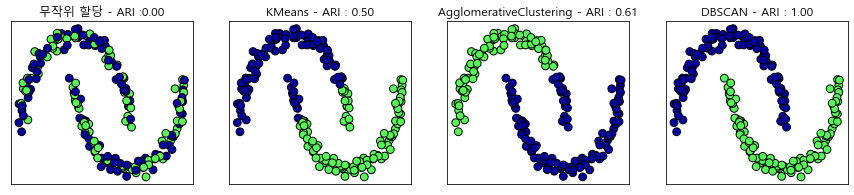

In [14]:
fig,axes =plt.subplots(1, 4, figsize=(15,3),  subplot_kw={'xticks':(), 'yticks':()})
#군집분석 알고리즘들과 비교를 위해서 무작위로 클러스터 할당한 것 
random_state=np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=(len(x_scaled)))

#무작위로 할당한 클러스터 그림
axes[0].scatter(x_scaled[:,0], x_scaled[:,1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 - ARI :{:.2f}'.format(adjusted_rand_score(y, random_clusters)))   

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{} - ARI : {:.2f}'.format(algorithm.__class__.__name__,adjusted_rand_score(y, clusters))) 
